### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import numpy as np
import matplotlib
from matplotlib.patches import Arc
import seaborn as sns
from matplotlib.cm import ScalarMappable
import os
import shutil
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def apply_better_style(right_ax = False, left_ax = True):
    # Apply better style
    sns.set_theme(style="whitegrid")
    custom_params = {"axes.spines.right": right_ax,"axes.spines.left": left_ax, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    #sns.set(font='Adobe Devanagari')
    sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3, 'axes.linewidth': 0.3})

    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    # Not italized latex
    matplotlib.rcParams['mathtext.default'] = 'regular'
    matplotlib.rcParams["font.weight"] = "light"

    # retina plot
    matplotlib.rcParams['figure.dpi'] = 150
    matplotlib.rcParams['savefig.dpi'] = 150


In [11]:
# Get output data
df_sim_1 = pd.read_parquet("/home/HPC/cdroin/DA_statistics_GPU/studies/scans/statistics_eol_massive/base_collider/xtrack_0000/output_particles.parquet")
df_sim_2 = pd.read_parquet("/home/HPC/cdroin/DA_statistics_GPU/studies/scans/statistics_eol_massive/base_collider/xtrack_0000_repr/output_particles.parquet")

l_df_sim =[df_sim_1,df_sim_2]+[pd.read_parquet(f"/home/HPC/cdroin/DA_statistics_GPU/studies/scans/statistics_eol_massive/base_collider/xtrack_0000_repr_{i}/output_particles.parquet") for i in range(2,5)]

# Rename column x to x_init and y to y_init
l_df_sim = [df_sim.rename(columns={"x": "x_final", "y": "y_final"}) for df_sim in l_df_sim]

# Get input data
df_particle_1 = pd.read_parquet("/home/HPC/cdroin/DA_statistics_GPU/studies/scans/statistics_eol_massive/base_collider/xtrack_0000/particles/00.parquet")
df_particle_2 = pd.read_parquet("/home/HPC/cdroin/DA_statistics_GPU/studies/scans/statistics_eol_massive/base_collider/xtrack_0000_repr/particles/00.parquet")

l_df_particle = [df_particle_1,df_particle_2]+[pd.read_parquet(f"/home/HPC/cdroin/DA_statistics_GPU/studies/scans/statistics_eol_massive/base_collider/xtrack_0000_repr_{i}/particles/00.parquet") for i in range(2,5)]

# Merge dataframe and only keep the columns we need
l_df_sim = [pd.merge(df_sim, df_particle, on=["particle_id"]) for df_sim, df_particle in zip(l_df_sim, l_df_particle)]
l_df_sim = [df_sim[['at_turn', 'state', "x", "y"]] for df_sim in l_df_sim]

# Concatenate both df
df_sim = pd.concat(l_df_sim, ignore_index = True)
# add a column amplitude
df_sim.loc[:,"amplitude"] = np.sqrt(df_sim["x"]**2 + df_sim["y"]**2)


df_sim_survived = df_sim[df_sim['state'] == 1]
df_sim_lost = df_sim[df_sim['state'] != 1]

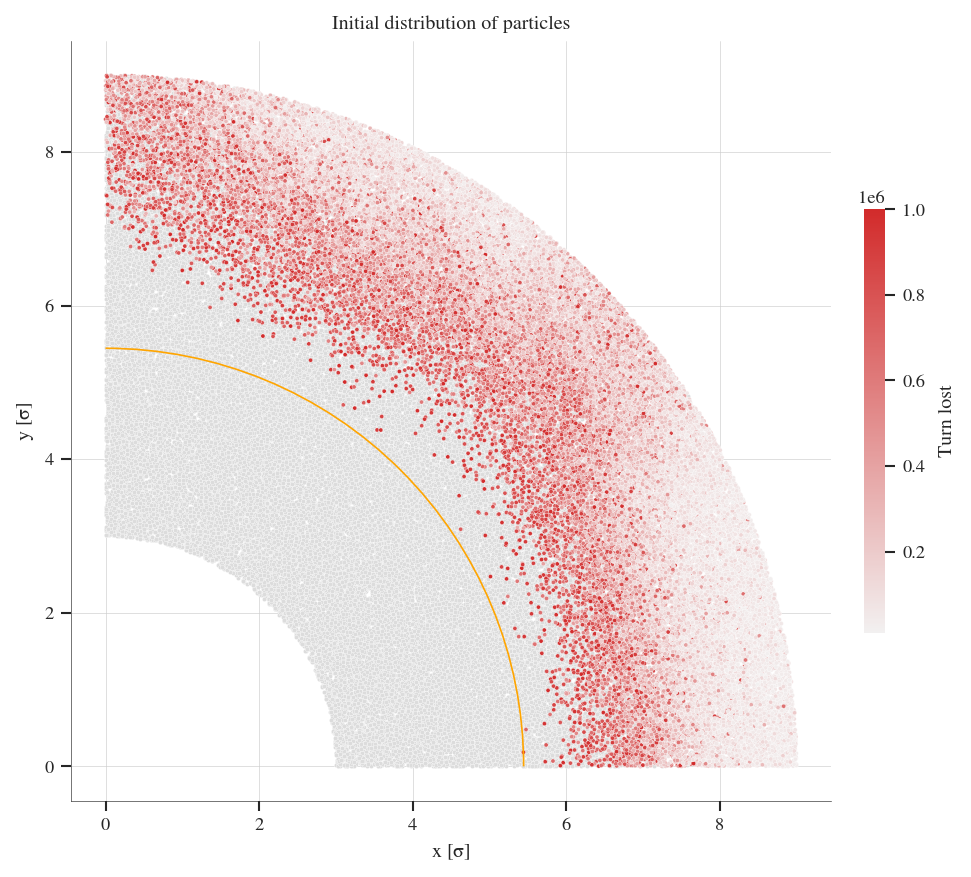

In [14]:
apply_better_style()
# Plot initial distribution of particles
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
norm = plt.Normalize(df_sim["at_turn"].min(), df_sim["at_turn"].max())
sm = sns.light_palette("#D22B2B", as_cmap=True, n_colors=100)
cmappable = ScalarMappable(norm=norm, cmap=sm)

sns.scatterplot(data=df_sim_survived, x="x", y="y", color = 'gainsboro', ax=ax, s=4)
sns.scatterplot(data=df_sim_lost, x="x", y="y", hue=df_sim_lost["at_turn"], palette = sm, ax=ax, s=4)
ax.set_xlabel(r"x [$\sigma$]")
ax.set_ylabel(r"y [$\sigma$]")
ax.set_title("Initial distribution of particles")
ax.get_legend().remove()
cbar = ax.figure.colorbar(cmappable, ax=ax, fraction=0.026, pad=0.04)
cbar.ax.set_ylabel("Turn lost", rotation=90, va="bottom", labelpad=15)
cbar.outline.set_visible(False)

# Add DA to plot
DA = np.min(df_sim_lost["amplitude"])
arc = Arc((0, 0), 2*DA, 2*DA, color='orange', theta1=0, theta2=90)
ax.add_patch(arc)
ax.set_aspect('equal', adjustable='box')

plt.grid(visible=None)
plt.show()

In [15]:

### Get minimum amplitude of particles lost as n_turn increases
df_sim_lost = df_sim_lost.sort_values(by="at_turn")
temp_amplitude = 1000
for idx, row in df_sim_lost.iterrows():
    if df_sim_lost.loc[idx, 'amplitude'] < temp_amplitude:
        temp_amplitude = df_sim_lost.loc[idx, 'amplitude']
    df_sim_lost.loc[idx, 'min_amplitude'] = temp_amplitude
    
### Compute the percentage of particles lost
tot_part = len(df_sim)
df_sim_lost['percent_lost'] = df_sim_lost['at_turn'].apply(lambda x: len(df_sim_lost[df_sim_lost['at_turn'] <= x])/tot_part*100)


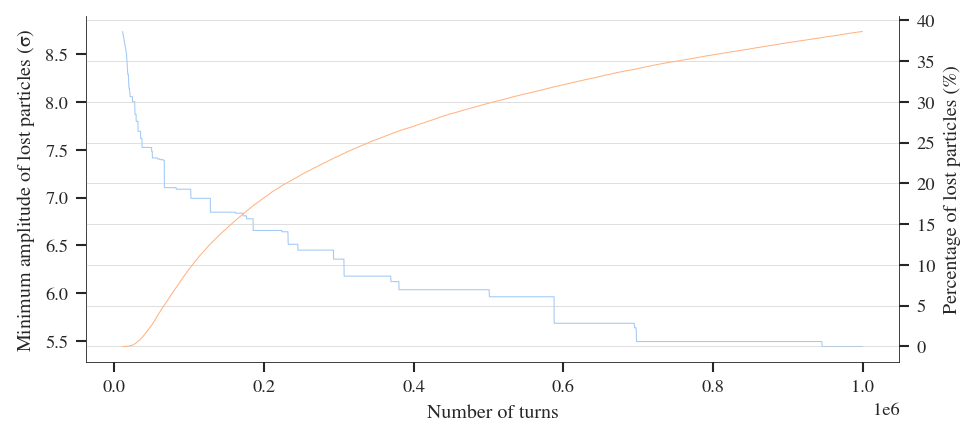

In [16]:
apply_better_style(right_ax = True)

# Plot evolution of minimum amplitude of particles lost and number of particles lost vs number of turns
# Do the plot with each lineplot having its own y-axis
l_colors = sns.color_palette("pastel")

fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
sns.lineplot(data=df_sim_lost[::10], x="at_turn", y="min_amplitude", ax=ax1, color=l_colors[0])
sns.lineplot(data=df_sim_lost[::10], x="at_turn", y="percent_lost", ax=ax2, color=l_colors[1])
ax1.set_xlabel("Number of turns")
ax1.set_ylabel(r"Minimum amplitude of lost particles ($\sigma$)")
ax2.set_ylabel("Percentage of lost particles (%)")
#ax1.set_title("Minimum amplitude of lost particles and percentage of lost particles vs number of turns")
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')
plt.grid()
plt.show()





Now doing frame 0
Now doing frame 0
Now doing frame 100000
Now doing frame 200000
Now doing frame 300000
Now doing frame 400000
Now doing frame 500000
Now doing frame 600000
Now doing frame 700000
Now doing frame 800000
Now doing frame 900000
Now doing frame 0


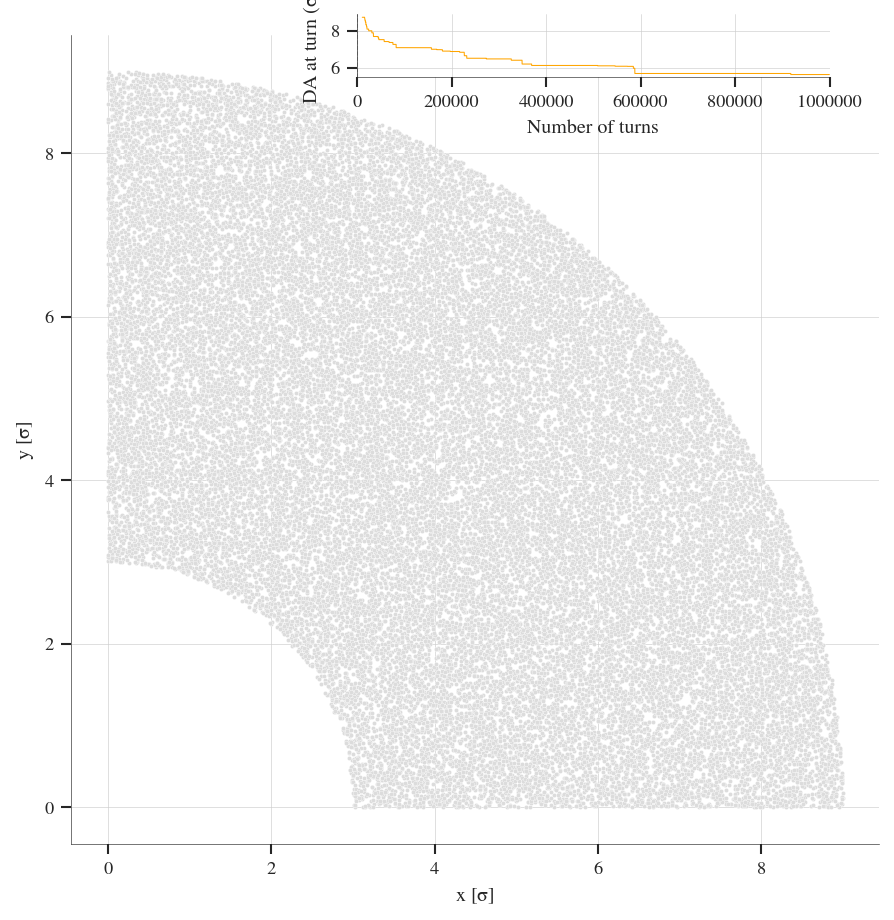

In [6]:
apply_better_style()

# Make an animation representing the DA as the number of turns increases
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
norm = plt.Normalize(df_sim["at_turn"].min(), df_sim["at_turn"].max())
sm = sns.light_palette("#D22B2B", as_cmap=True, n_colors=100)
cmappable = ScalarMappable(norm=norm, cmap=sm)


# Add inset plot for evolution of DA
ax_inset = fig.add_axes([0.4, 0.84, 0.45, 0.06])
sns.lineplot(data=df_sim_lost[:], x="at_turn", y="min_amplitude", ax=ax_inset, color='orange')
ax_inset.set_xlabel("Number of turns")
ax_inset.set_ylabel(r"DA at turn ($\sigma$)")
vline = ax_inset.axvline(x=0, color='darkgrey', linestyle='--')
ax_inset.set_xlim(0, df_sim["at_turn"].max())
ax_inset.grid(visible=True)
ax_inset.ticklabel_format(style='sci',scilimits=(-8,8),axis='both')

def update(frame):
    print('Now doing frame {}'.format(frame))
    ax.clear()
    sns.scatterplot(data=df_sim, x="x", y="y", color = 'gainsboro', ax=ax, s=4)
    df_lost_current_frame = df_sim_lost[df_sim_lost["at_turn"] <= frame]
    if len(df_lost_current_frame) > 0:
        sns.scatterplot(data=df_lost_current_frame, x="x", y="y", hue=df_lost_current_frame["at_turn"], palette = sm, ax=ax, s=4)
        ax.get_legend().remove()
        DA = df_lost_current_frame["min_amplitude"].min()
        arc = Arc((0, 0), 2*DA, 2*DA, color='orange', theta1=0, theta2=90)
        ax.add_patch(arc)
    
    ax.set_xlabel(r"x [$\sigma$]")
    ax.set_ylabel(r"y [$\sigma$]")
    # ax.set_title(f"Representation of particles lost at turn {frame}")
    
    # Update vertical line inset plot
    vline.set_xdata([frame,frame])
    ax_inset.grid(visible=True)

    ax.set_aspect('equal', adjustable='box')
    ax.grid(visible=True)
    
    # Color bar for latest turns
    # if frame >= 700000:
    #     cbar = ax.figure.colorbar(cmappable, ax=ax, fraction=0.026, pad=0.04)
    #     cbar.ax.set_ylabel("Turn lost", rotation=90, va="bottom", labelpad=15)
    #     cbar.outline.set_visible(False)

    return ax

ani = FuncAnimation(fig, update, frames=np.arange(0, 1000000, 100000), repeat=False)
ani.save('DA_evolution.gif', writer='imagemagick', fps=60)

In [25]:
n_repeat = 100
l_distr_DA = []
l_distr_percentile_95 = [] 
l_distr_median = []
l_distr_percentile_90 = []
# Get how the distribution of the DA evolves depending on the number of particles
l_subsampling_size = np.logspace(1, 5, 10, dtype=int)
for subsampling_size in l_subsampling_size:
    l_DA_per_sample = []
    l_distr_percentile_95_per_sample = []
    l_distr_percentile_90_per_sample = []
    l_distr_median_per_sample = []
    for i in range(n_repeat):
        # Subsample df_sim_lost['amplitude']
        df_sampled = df_sim.sample(n=subsampling_size)
        # Only keep lost particles
        df_sampled = df_sampled[df_sampled['state'] != 1]
        # Compute distribution of DA
        l_DA_per_sample.append(np.min(df_sampled['amplitude']))
        percentile_95 = df_sampled['amplitude'].quantile(0.02)
        percentile_90 = df_sampled['amplitude'].quantile(0.1)
        # Compute percentile 95 and 90
        l_distr_percentile_95_per_sample.append(percentile_95)
        l_distr_percentile_90_per_sample.append(percentile_90)
        # Compute median
        l_distr_median_per_sample.append(df_sampled['amplitude'].quantile(0.5))
        
    l_distr_DA.append(l_DA_per_sample)
    l_distr_percentile_95.append(l_distr_percentile_95_per_sample)
    l_distr_percentile_90.append(l_distr_percentile_90_per_sample)
    l_distr_median.append(l_distr_median_per_sample)

In [26]:
# Create a df that contains the following columns: subsampling_size, DA, percentile_95, percentile_90, median
df_DA_distr = pd.DataFrame()
df_DA_distr['subsampling_size'] = np.repeat(l_subsampling_size, n_repeat)
df_DA_distr['DA'] = np.concatenate(l_distr_DA)
df_DA_distr['percentile_95'] = np.concatenate(l_distr_percentile_95)
df_DA_distr['percentile_90'] = np.concatenate(l_distr_percentile_90)
df_DA_distr['median'] = np.concatenate(l_distr_median)



In [27]:
df_DA_distr

,subsampling_size,DA,percentile_95,percentile_90,median
0,10,7.421721,7.454782,7.587024,8.248236
1,10,7.013070,7.020818,7.051810,8.126031
2,10,7.393969,7.401074,7.429495,7.571600
3,10,7.356000,7.365598,7.403987,7.595933
4,10,7.285184,7.356438,7.641456,8.202978
...,...,...,...,...,...
995,100000,5.444343,6.480019,7.033940,8.113846
996,100000,5.444343,6.480019,7.033940,8.113846
997,100000,5.444343,6.480019,7.033940,8.113846
998,100000,5.444343,6.480019,7.033940,8.113846


/home/HPC/cdroin/DA_statistics_GPU/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/home/HPC/cdroin/DA_statistics_GPU/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

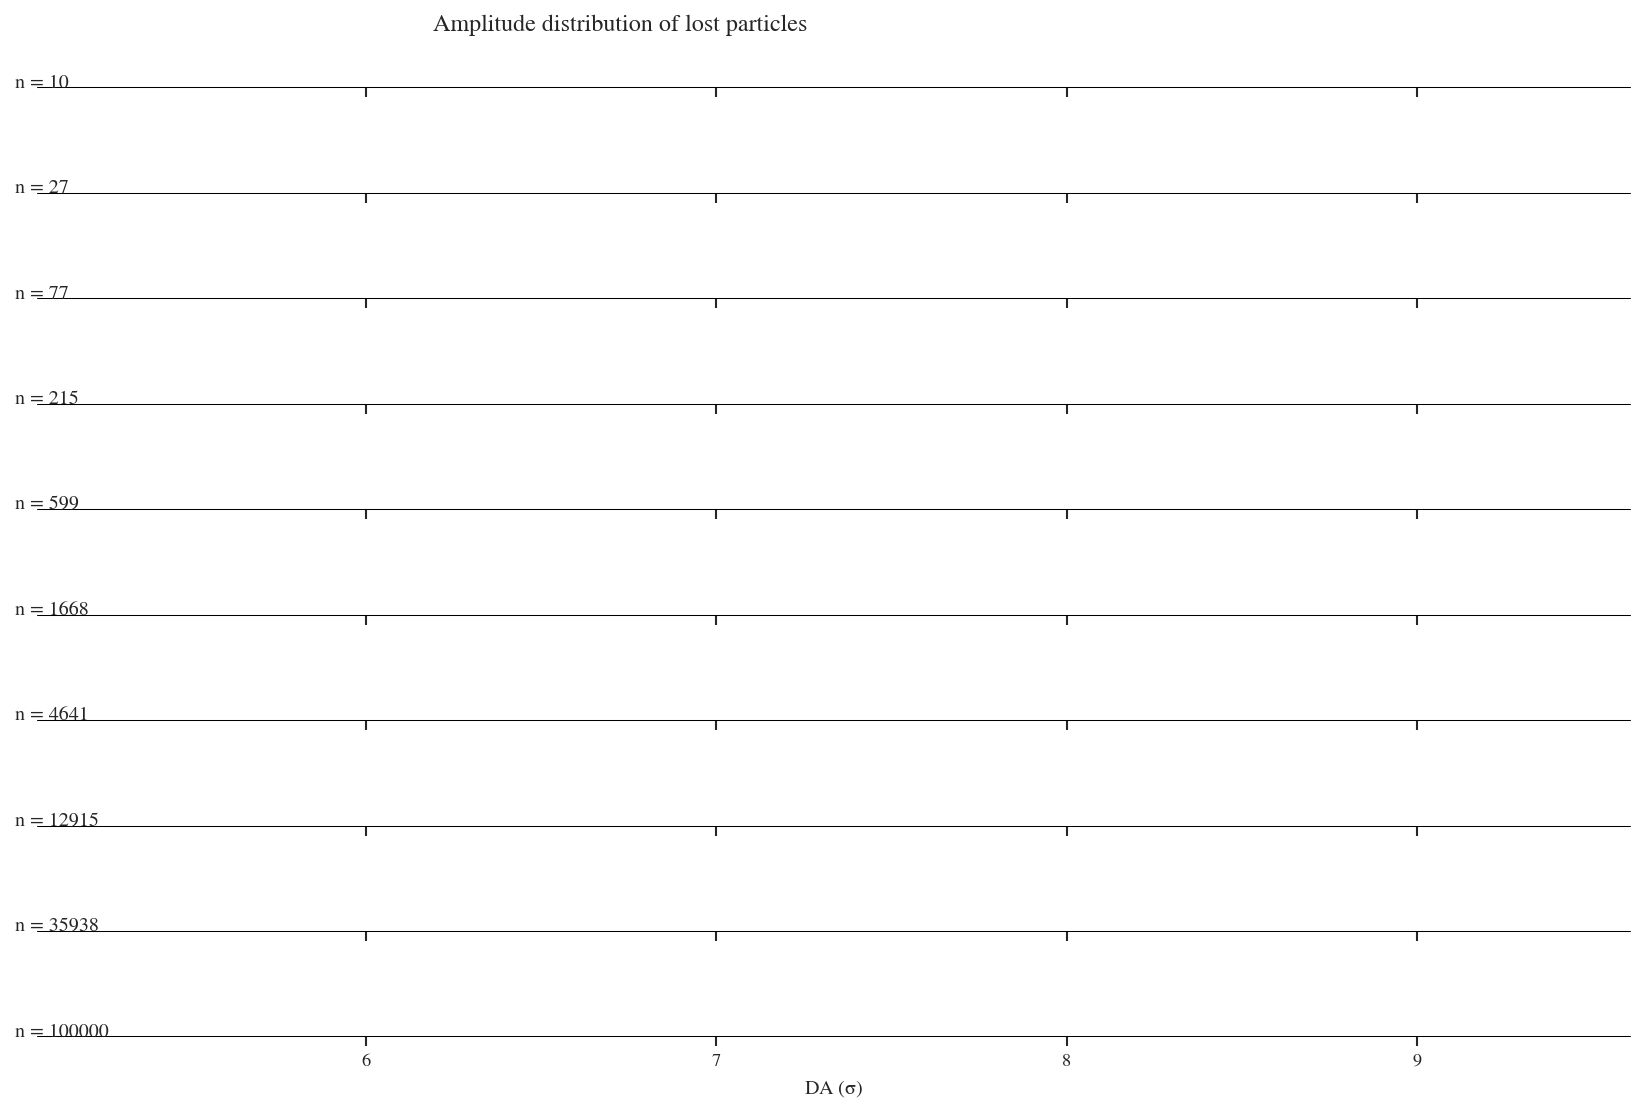

In [28]:
apply_better_style(right_ax = False, left_ax = False)


# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df_DA_distr, row='subsampling_size', aspect=15, height=0.75)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'DA', bw_adjust=1, clip_on=False, fill=True, linewidth=0, common_norm = True)
g.map(sns.kdeplot, 'median', bw_adjust=1, clip_on=False, fill=True, linewidth=0, common_norm = True, color = 'orange')
g.map(sns.kdeplot, 'percentile_90', bw_adjust=1, clip_on=False, fill=True, linewidth=0, common_norm = True, color = 'green')
g.map(sns.kdeplot, 'percentile_95', bw_adjust=1, clip_on=False, fill=True, linewidth=0, common_norm = True, color = 'red')

# here we add a white line that represents the contour of each kdeplot
#g.map(sns.kdeplot, 'DA', bw_adjust=1, clip_on=False,  color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0, lw=0.5, clip_on=False, color = 'black')

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.set(ylabel=None)
    ax.text(5, 0.5, "n = " + str(l_subsampling_size[i]))


# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
#g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels())
plt.xlabel(r"DA ($\sigma$)")
g.fig.suptitle('Amplitude distribution of lost particles', ha='right')

plt.show()

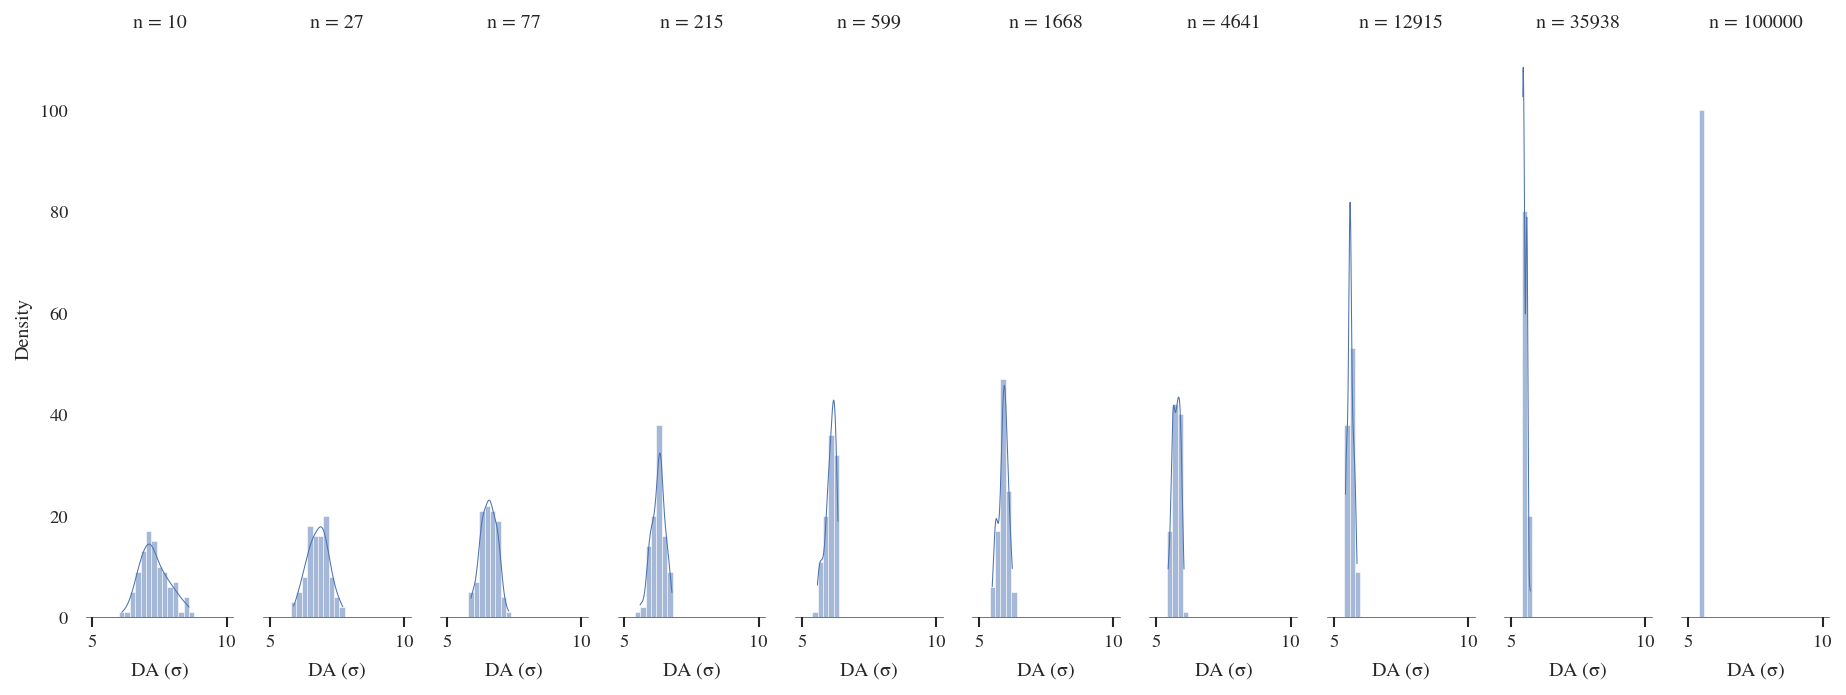

In [29]:
# Plot all the DA distributions, with normal fit, sharing the same y-axis
apply_better_style(right_ax = False, left_ax = False)
fig, ax = plt.subplots(1, len(l_subsampling_size), figsize=(15, 5), sharey=True)
for i, l_DA_per_sample in enumerate(l_distr_DA):
    sns.histplot(l_DA_per_sample, kde=True, ax=ax[i], binrange=(5,10), binwidth = 0.2)
    ax[i].set_title(f"n = {l_subsampling_size[i]}")
    ax[i].set_xlabel("DA ($\sigma$)")
    ax[i].set_ylabel("Density")
    ax[i].grid(visible=False)
    ax[i].tick_params(left=False, bottom=True)

plt.show()
    


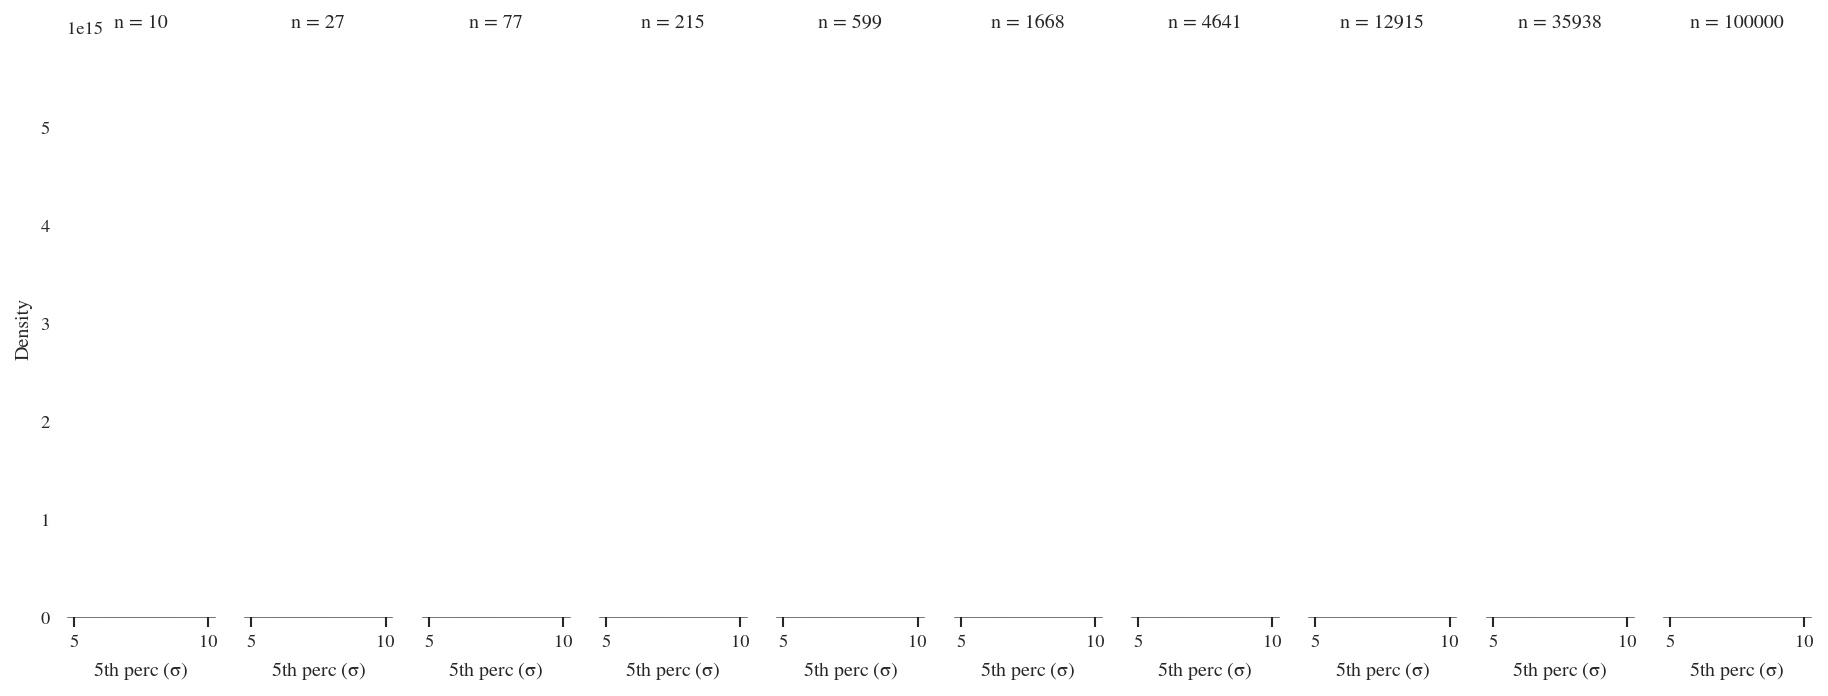

In [30]:
# Plot all the percentile 95 distributions, with normal fit, sharing the same y-axis
apply_better_style(right_ax = False, left_ax = False)
fig, ax = plt.subplots(1, len(l_subsampling_size), figsize=(15, 5), sharey=True)
for i, l_distr_percentile_95_per_sample in enumerate(l_distr_percentile_95):
    sns.histplot(l_distr_percentile_95_per_sample, kde=True, ax=ax[i], binrange=(5,10), binwidth = 0.2,color='orange')
    ax[i].set_title(f"n = {l_subsampling_size[i]}")
    ax[i].set_xlabel("5th perc ($\sigma$)")
    ax[i].set_ylabel("Density")
    ax[i].grid(visible=False)
    ax[i].tick_params(left=False, bottom=True)
plt.show()

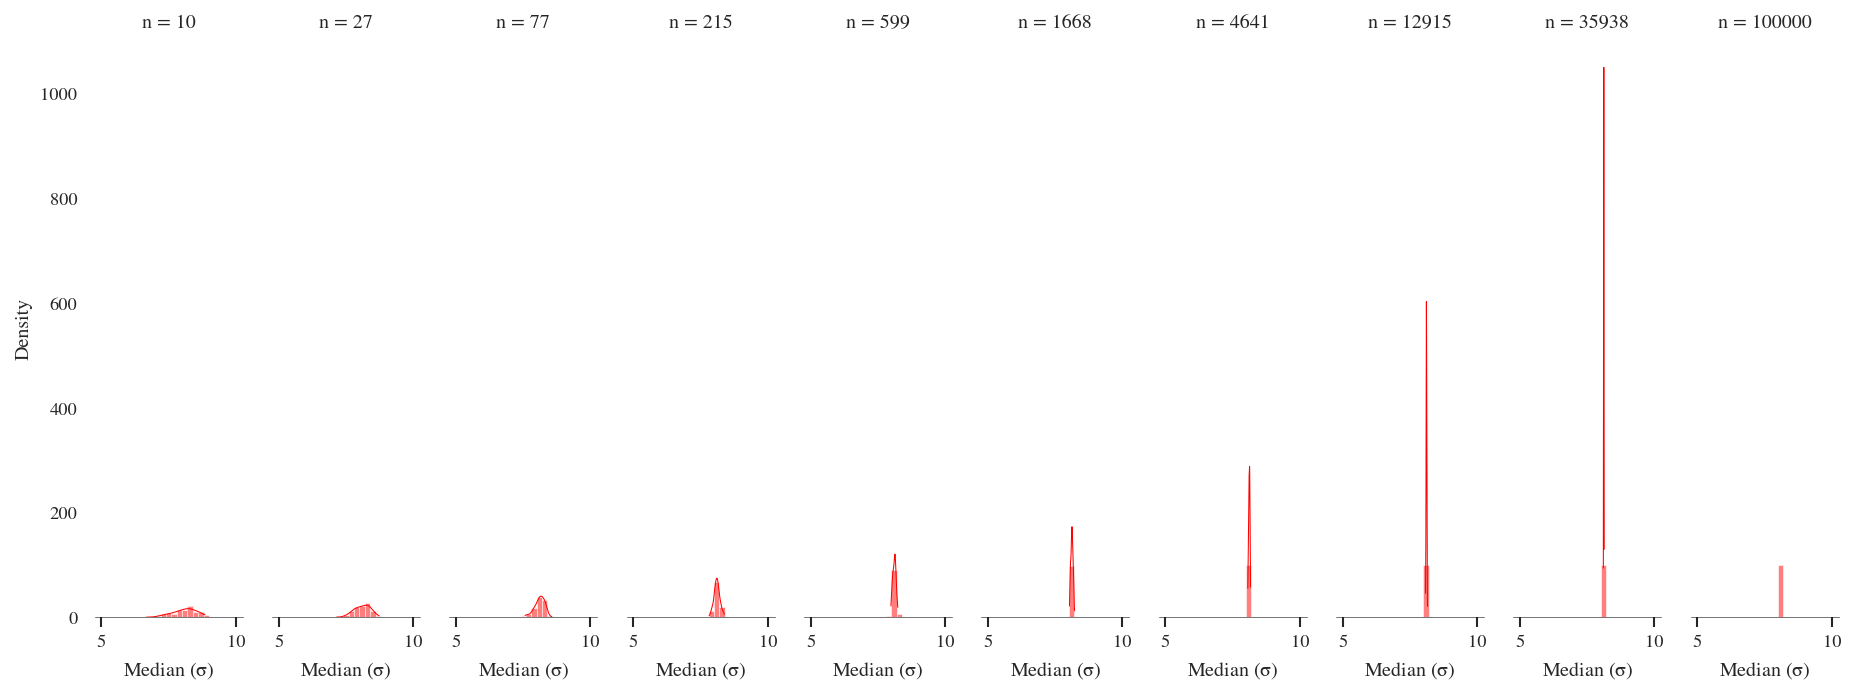

In [31]:
# Plot all the percentile 95 distributions, with normal fit, sharing the same y-axis
apply_better_style(right_ax = False, left_ax = False)
fig, ax = plt.subplots(1, len(l_subsampling_size), figsize=(15, 5), sharey=True)
for i, l_distr_median_per_sample in enumerate(l_distr_median):
    sns.histplot(l_distr_median_per_sample, kde=True, ax=ax[i], binrange=(5,10), binwidth = 0.2,color='red')
    ax[i].set_title(f"n = {l_subsampling_size[i]}")
    ax[i].set_xlabel("Median ($\sigma$)")
    ax[i].set_ylabel("Density")
    ax[i].grid(visible=False)
    ax[i].tick_params(left=False, bottom=True)
plt.show()

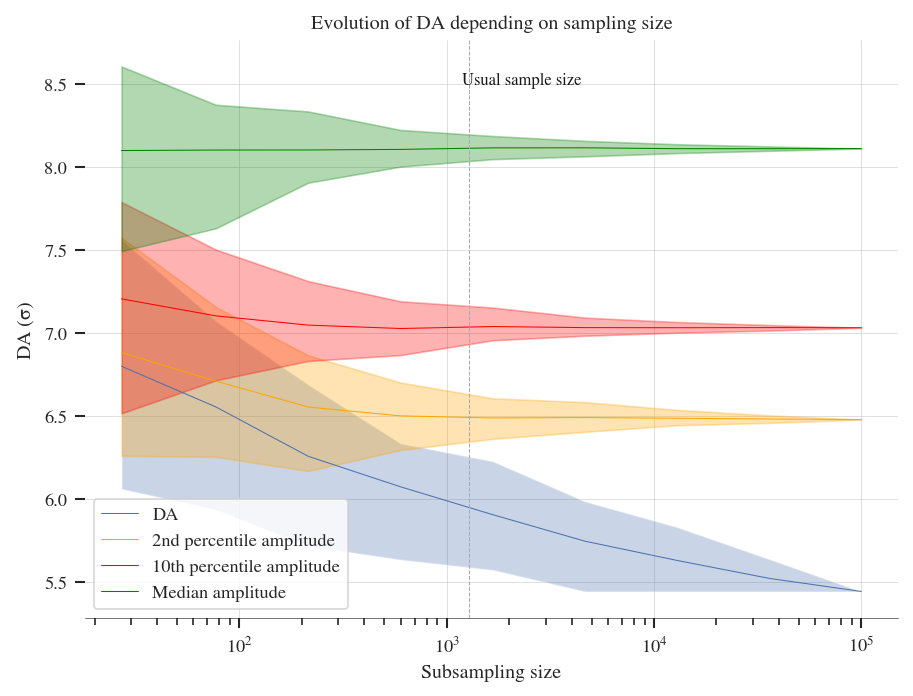

In [32]:
# Plot evolution of DA depending on sampling size, as line plot with confidence interval 
l_mean_DA = []
l_std_DA = []
l_conf_int_DA = []
for l_DA_per_sample in l_distr_DA:
    l_mean_DA.append(np.mean(l_DA_per_sample))
    l_std_DA.append(np.std(l_DA_per_sample))
    l_conf_int_DA.append(np.percentile(l_DA_per_sample, [2.5, 97.5]))

# Add percentile 95 to the plot
l_mean_percentile_95 = []
l_std_percentile_95 = []
l_conf_int_percentile_95 = []
for l_distr_percentile_95_per_sample in l_distr_percentile_95:
    l_mean_percentile_95.append(np.mean(l_distr_percentile_95_per_sample))
    l_std_percentile_95.append(np.std(l_distr_percentile_95_per_sample))
    l_conf_int_percentile_95.append(np.percentile(l_distr_percentile_95_per_sample, [2.5, 97.5]))

# Add percentile 90 to the plot
l_mean_percentile_90 = []
l_std_percentile_90 = []
l_conf_int_percentile_90 = []
for l_distr_percentile_90_per_sample in l_distr_percentile_90:
    l_mean_percentile_90.append(np.mean(l_distr_percentile_90_per_sample))
    l_std_percentile_90.append(np.std(l_distr_percentile_90_per_sample))
    l_conf_int_percentile_90.append(np.percentile(l_distr_percentile_90_per_sample, [2.5, 97.5]))

# Add median to the plot
l_mean_median = []
l_std_median = []
l_conf_int_median = []
for l_distr_median_per_sample in l_distr_median:
    l_mean_median.append(np.mean(l_distr_median_per_sample))
    l_std_median.append(np.std(l_distr_median_per_sample))
    l_conf_int_median.append(np.percentile(l_distr_median_per_sample, [2.5, 97.5]))


fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.lineplot(x=l_subsampling_size, y=l_mean_DA, ax=ax, label='DA')
ax.fill_between(l_subsampling_size, np.array(l_conf_int_DA)[:,0], np.array(l_conf_int_DA)[:,1], alpha=0.3)

# add percentile 95
sns.lineplot(x=l_subsampling_size, y=l_mean_percentile_95, ax=ax, color='orange', label='2nd percentile amplitude')
ax.fill_between(l_subsampling_size, np.array(l_conf_int_percentile_95)[:,0], np.array(l_conf_int_percentile_95)[:,1], alpha=0.3, color='orange')

# Add percentile 90
sns.lineplot(x=l_subsampling_size, y=l_mean_percentile_90, ax=ax, color='red', label='10th percentile amplitude')
ax.fill_between(l_subsampling_size, np.array(l_conf_int_percentile_90)[:,0], np.array(l_conf_int_percentile_90)[:,1], alpha=0.3, color='red')

# Add median
sns.lineplot(x=l_subsampling_size, y=l_mean_median, ax=ax, color='green', label='Median amplitude')
ax.fill_between(l_subsampling_size, np.array(l_conf_int_median)[:,0], np.array(l_conf_int_median)[:,1], alpha=0.3, color='green')

# Add vertical line at 1280 particles with text stating: "Usual sample size"
ax.axvline(x=1280, color='darkgrey', linestyle='--', lw = 0.5)
ax.text(2300, 8.5, "Usual sample size", color='black', fontsize=8, ha='center', alpha=0.9)

ax.set_xscale('log')
ax.set_xlabel("Subsampling size")
ax.set_ylabel("DA ($\sigma$)")
ax.set_title("Evolution of DA depending on sampling size")
ax.grid(visible=True)
plt.show()



Compute confidence on the value of the DA through bootstrapping.

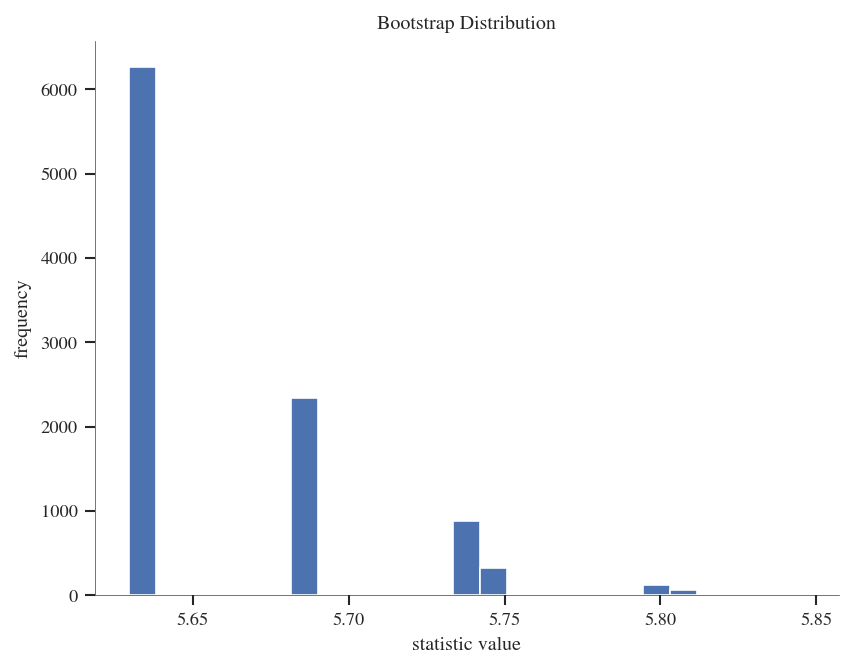

In [12]:
res = bootstrap((df_sim_lost['amplitude'].values,), np.min, confidence_level=0.9)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

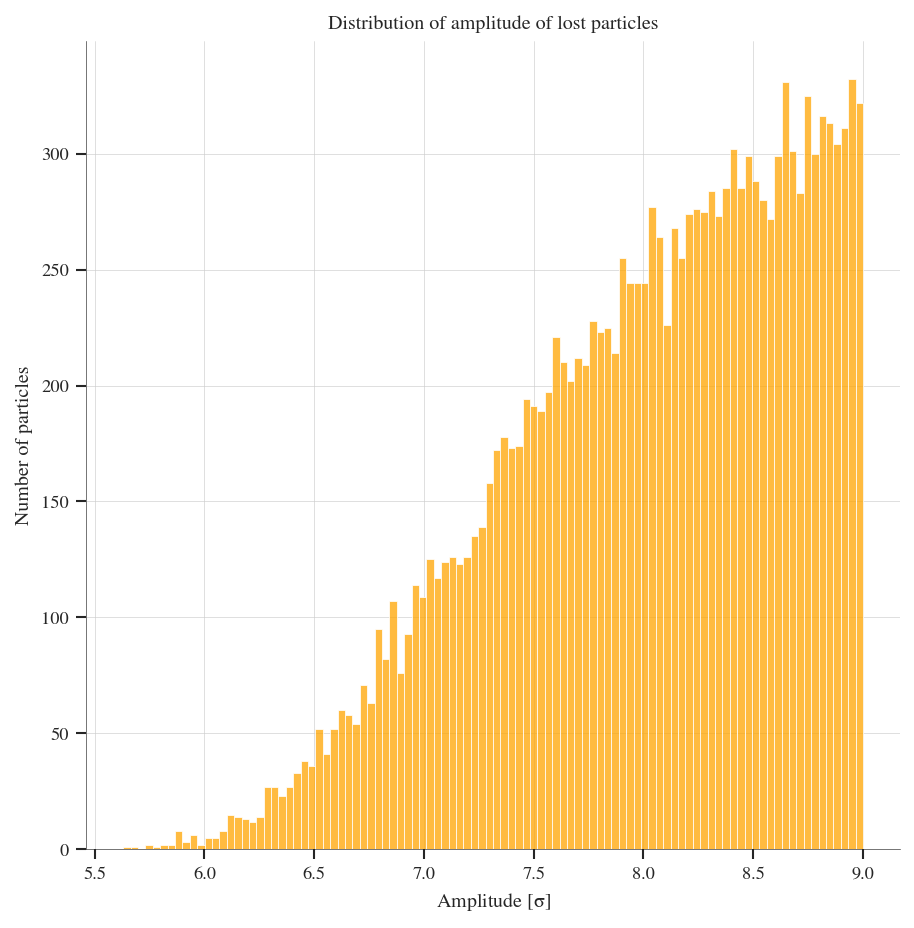

In [13]:
# Plot distribution of amplitude of lost particles
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.histplot(data=df_sim_lost, x="amplitude", bins=100, ax=ax, color='orange')
ax.set_xlabel(r"Amplitude [$\sigma$]")
ax.set_ylabel("Number of particles")
ax.set_title("Distribution of amplitude of lost particles")
plt.grid()


In [14]:
print(res.confidence_interval)

ConfidenceInterval(low=5.6293697134514495, high=5.686996324649322)
